In [350]:
# Raghav Kalyanaraman

In [351]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

# print your pandas version
pd.__version__ 

'2.2.3'

In [352]:
data = pd.read_csv('train.csv')
df = pd.DataFrame(data)

print(data.isnull().sum())
print("Total Number of Missing Values: ", data.isnull().sum().sum())

# print(df)

# print(df.columns)

# print(df.info())



Id                      0
Name                31383
Intake Time             0
Found Location          0
Intake Type             0
Intake Condition        0
Animal Type             0
Sex upon Intake         2
Age upon Intake         1
Breed                   0
Color                   0
Outcome Time            0
Date of Birth           0
Outcome Type            0
dtype: int64
Total Number of Missing Values:  31386


Mean (months):  22.879773321578085
Median (months):  12.0


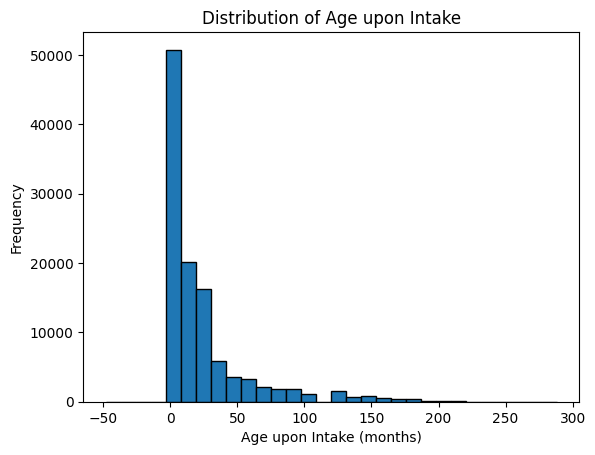

In [353]:
#Remove the columns that are not needed
df = df.drop(['Name'], axis=1)
df = df.drop(['Found Location'], axis=1)

# Determine age distribution

# df['Age upon Intake'].describe()

# Need to convert all values in 'Age upon Intake' to numeric
# Convert 'Age upon Intake' to numeric by extracting the numeric part and converting to months
def convert_age_to_months(age):
    if pd.isnull(age):
        return None
    parts = age.split()
    if "year" in parts[1]:
        return int(parts[0]) * 12
    elif "month" in parts[1]:
        return int(parts[0])
    elif "week" in parts[1]:
        return int(parts[0]) / 4
    elif "day" in parts[1]:
        return int(parts[0]) / 30
    else:
        return None
    
def convert_age_to_weeks(age):
    if pd.isnull(age):
        return None
    parts = age.split()
    if "year" in parts[1]:
        return int(parts[0]) * 52
    elif "month" in parts[1]:
        return int(parts[0]) * 4
    elif "week" in parts[1]:
        return int(parts[0])
    elif "day" in parts[1]:
        return int(parts[0]) / 7
    else:
        return None

# Convert 'Age upon Intake' to months
df['Age upon Intake'] = df['Age upon Intake'].apply(convert_age_to_months)

# Convert 'Age upon Intake' to weeks
# df['Age upon Intake'] = df['Age upon Intake'].apply(convert_age_to_weeks)


# print(df.isnull().sum())
# Check for missing values in 'Age upon Intake' column
# print(df['Age upon Intake'].isnull().sum())
#Print some of the missing values in 'Age upon Intake' column
# print(df[df['Age upon Intake'].isnull()]['Age upon Intake'])

mean = df['Age upon Intake'].mean()
median = df['Age upon Intake'].median()

print("Mean (months): ", mean)
print("Median (months): ", median)

# Try graphing the distribution of 'Age upon Intake'
plt.hist(df['Age upon Intake'].dropna(), bins=30, edgecolor='black')
plt.xlabel('Age upon Intake (months)')
plt.ylabel('Frequency')
plt.title('Distribution of Age upon Intake')

# Impute the missing values with the median
df['Age upon Intake'] = df['Age upon Intake'].fillna(median)
# Check for missing values in 'Age upon Intake' column again'




0


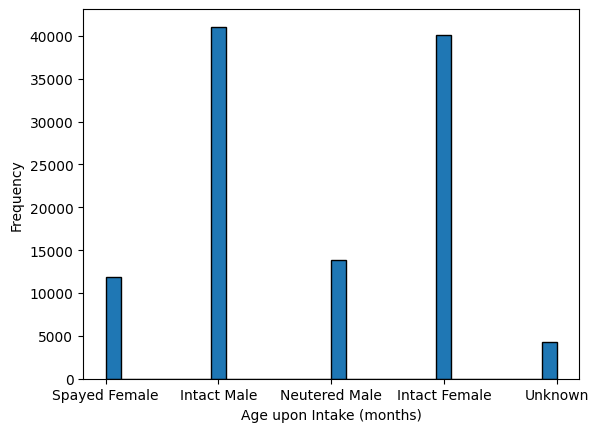

In [354]:
#Evaluate the Sex Upon Intake column

#Graph Sex upon intake
plt.hist(df['Sex upon Intake'].dropna(), bins=30, edgecolor='black')
plt.xlabel('Age upon Intake (months)')
plt.ylabel('Frequency')

#We have an unknown category for Sex Upon Intake
# We can impute the missing values with the unknown category

# Impute Sex Upon Intake with the mode value
# df['Sex upon Intake'] = df['Sex upon Intake'].fillna(df['Sex upon Intake'].mode()[0])


# Impute the missing values with 'Unknown'
df['Sex upon Intake'] = df['Sex upon Intake'].fillna('Unknown')

# Verify the imputation
print(df['Sex upon Intake'].isnull().sum())





In [355]:
# Time In System category

# Create a new column 'Time In System' which is the difference between 'Intake Time Stamp' and 'Outcome Time Stamp'

#Given as 5/12/2022 0:23

df['Intake Time'] = pd.to_datetime(df['Intake Time'])
df['Outcome Time'] = pd.to_datetime(df['Outcome Time'])

#Verify the conversion
# print(df['Intake Time'].head())
# print(df['Outcome Time'].head())

df['Time In System'] = df['Outcome Time'] - df['Intake Time']
print(df['Time In System'].head())

# Convert 'Time In System' to days and hours
df['Time In System'] = df['Time In System'].dt.days + df['Time In System'].dt.seconds / 3600
print(df['Time In System'].head())



C:\Users\Raghav\AppData\Local\Temp\ipykernel_28248\1908999929.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Outcome Time'] = pd.to_datetime(df['Outcome Time'])


0   0 days 02:14:00
1   6 days 22:34:00
2   0 days 14:12:00
3   3 days 04:58:00
4   2 days 03:52:00
Name: Time In System, dtype: timedelta64[ns]
0     2.233333
1    28.566667
2    14.200000
3     7.966667
4     5.866667
Name: Time In System, dtype: float64


In [356]:
# Color of the animal

# Different values of color in the dataset
# print(df['Color'].unique())
# unique_colors = df['Color'].unique()
# print("First 50 unique colors:", unique_colors[:50])
# print("Total unique colors:", len(unique_colors))

# # Graph the color of the animal
# plt.hist(df['Color'].dropna(), bins=30, edgecolor='black')
# plt.xlabel('Color of the Animal')
# plt.ylabel('Frequency')
# plt.title('Distribution of Color of the Animal')

# Split the color into primary and secondary colors
# Determine how many have only a primary color

# Split the 'Color' column into primary and secondary colors
def split_colors(color):
    if pd.isnull(color):
        return None, None
    parts = color.replace('/', ' ').split()  # Replace '/' with space and split
    primary = parts[0] if len(parts) > 0 else None
    secondary = ' '.join(parts[1:]) if len(parts) > 1 else None
    return primary, secondary

df[['Primary Color', 'Secondary Color']] = df['Color'].apply(
    lambda x: pd.Series(split_colors(x))
)

#Remove the seconddary color column FOR NOW:
df = df.drop(['Secondary Color'], axis=1)

print(df['Primary Color'].isnull().sum())

# df['Primary Color'] = df['Color'].apply(lambda x: x.split('/')[0] if pd.notnull(x) else None)
# df['Secondary Color'] = df['Color'].apply(lambda x: x.split('/')[1] if '/' in str(x) else None)

# Determine how many have only a primary color
# only_primary_count = df['Secondary Color'].isnull().sum()

# print("Number of animals with only a primary color:", only_primary_count)


# Display the first few rows to verify
# print(df[['Color', 'Primary Color', 'Secondary Color']].head())


# Display the first few primary only colors
# primary_only_colors = df[df['Secondary Color'].isnull()]['Primary Color'].unique()
# print("First few primary only colors:", primary_only_colors[:100])
# Print all unique primary only colors

# print("All unique primary only colors:") 
# print(primary_only_colors)

# Print all unique primary colors of the animals
# unique_primary_colors = df['Primary Color'].unique()
# print("Unique primary colors:", unique_primary_colors)
# print("Total unique primary colors:", len(unique_primary_colors))

# # Print all unique secondary colors of the animals
# unique_secondary_colors = df['Secondary Color'].unique()
# print("Unique secondary colors:", unique_secondary_colors)
# print("Total unique secondary colors:", len(unique_secondary_colors))

# tabby_white_secondary = df[df['Secondary Color'] == 'Tabby White']
# print("Number of animals with Tabby White as secondary color:", len(tabby_white_secondary))
# print("Unique primary colors for Tabby White:", tabby_white_secondary['Primary Color'].unique())



0


['Dog' 'Cat']
Number of dogs: 61378
Number of cats: 49779


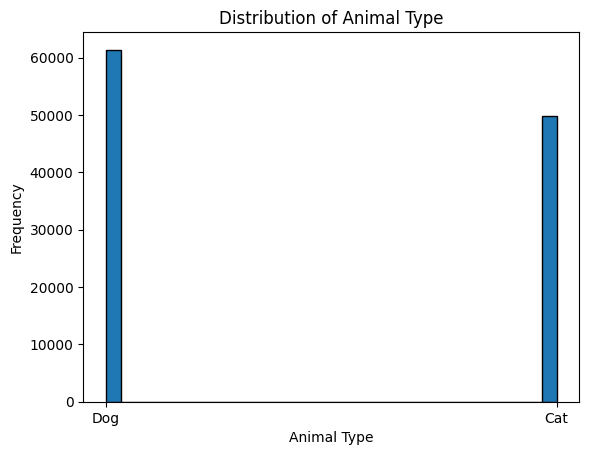

In [357]:
# Animal Type

print(df['Animal Type'].unique())
print("Number of dogs:", len(df[df['Animal Type'] == 'Dog']))
print("Number of cats:", len(df[df['Animal Type'] == 'Cat']))
# Graph the animal type
plt.hist(df['Animal Type'], bins=30, edgecolor='black')
plt.xlabel('Animal Type')
plt.ylabel('Frequency')
plt.title('Distribution of Animal Type')
plt.show()

Number of unique breeds: 2440


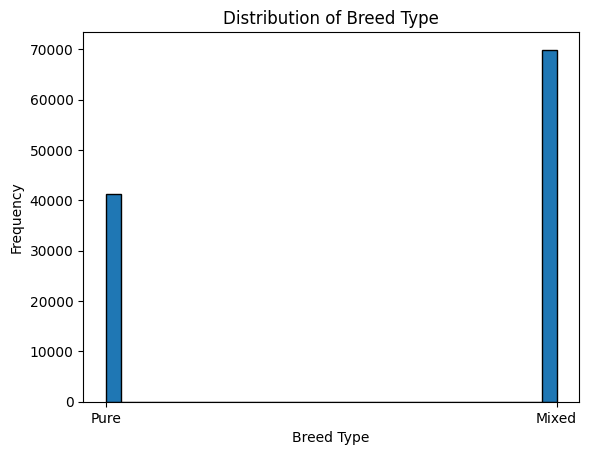

In [358]:
# Breed 

# print(df['Breed'].unique())
print("Number of unique breeds:", len(df['Breed'].unique()))


# For now we will just split pure breeds and mixed breeds
df['Breed Type'] = df['Breed'].apply(lambda x: 'Mixed' if 'Mix' in x else 'Pure')
# Graph the breed type
plt.hist(df['Breed Type'], bins=30, edgecolor='black')
plt.xlabel('Breed Type')
plt.ylabel('Frequency')
plt.title('Distribution of Breed Type')
plt.show()




Grouped intake conditions:
['Health Status' 'Life stage' 'Other' 'Medical-related' 'Behavioral']


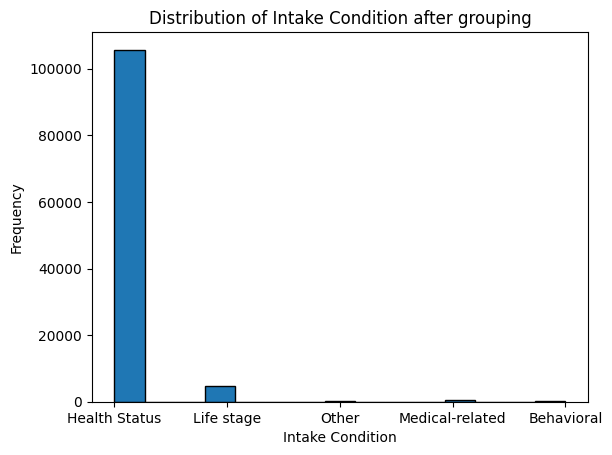

In [359]:
# Intake Condition
# print(df['Intake Condition'].unique())
# print("Number of unique intake conditions:", len(df['Intake Condition'].unique()))
# # Graph the intake condition
# plt.hist(df['Intake Condition'], bins=30, edgecolor='black')
# plt.xlabel('Intake Condition')
# plt.ylabel('Frequency')
# plt.title('Distribution of Intake Condition')
# plt.show()

# Group the intake condition into the following:
# Medical-related: 'Med Attn', 'Medical', 'Med Urgent', 'Neurologic', 'Congenital', 'Parvo', 'Agonal'
# Life stage: 'Neonatal', 'Aged', 'Pregnant', 'Nursing'
# Health status: 'Normal', 'Injured', 'Sick', 'Behavior', 'Feral'
# Other: 'Unknown', 'Other', 'Space'

def group_intake_condition(condition):
    if pd.isnull(condition):
        return 'Other'
    condition = condition.lower()
    if condition in ['med attn', 'medical', 'med urgent', 'neurologic', 'congenital', 'parvo', 'agonal']:
        return 'Medical-related'
    elif condition in ['neonatal', 'aged', 'pregnant', 'nursing']:
        return 'Life stage'
    elif condition in ['normal', 'injured', 'sick']:
        return 'Health Status'
    elif condition in ['behavior', 'feral']:
        return 'Behavioral'
    else:
        return 'Other'

df['Intake Condition'] = df['Intake Condition'].apply(group_intake_condition)
# Verify the grouping  
print("Grouped intake conditions:")
print(df['Intake Condition'].unique())


# Graph the intake condition after grouping
plt.hist(df['Intake Condition'], bins=15, edgecolor='black')
plt.xlabel('Intake Condition')
plt.ylabel('Frequency')
plt.title('Distribution of Intake Condition after grouping')
plt.show()


['Stray' 'Public Assist' 'Owner Surrender' 'Abandoned'
 'Euthanasia Request' 'Wildlife']
Number of unique intake types: 6
Number of unique intake types after combining: 4


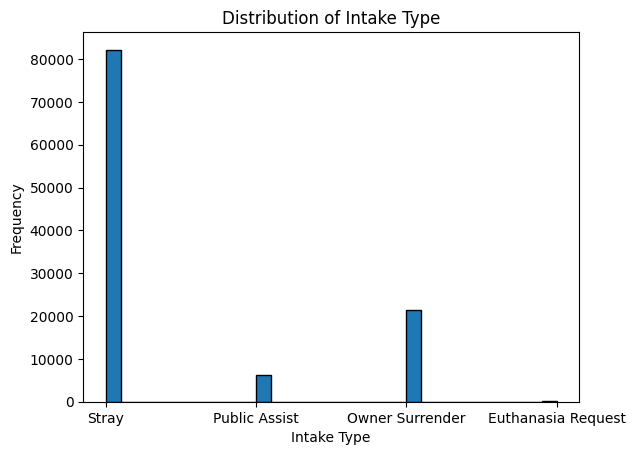

In [360]:
# Intake Type
print(df['Intake Type'].unique())
print("Number of unique intake types:", len(df['Intake Type'].unique()))


#Combine abandoned with wildlife (wildlife only has 1 record)

df['Intake Type'] = df['Intake Type'].replace('Abandoned', 'Wildlife')
# Remove the 'Wildlife' category from the intake type
df = df[df['Intake Type'] != 'Wildlife']

print("Number of unique intake types after combining:", len(df['Intake Type'].unique()))

# Graph the intake type
plt.hist(df['Intake Type'], bins=30, edgecolor='black')
plt.xlabel('Intake Type')
plt.ylabel('Frequency')
plt.title('Distribution of Intake Type')
plt.show()


In [361]:
# # Review all the columns in the dataset
# print(df.columns)
# print(df.info())
# print(df.describe())

# Drop the columns that are not needed
df = df.drop(['Intake Time', 'Outcome Time', 'Color', 'Breed', 'Id', 'Date of Birth'], axis=1)

print(df.columns)
print(df.head())
print(df.info())




Index(['Intake Type', 'Intake Condition', 'Animal Type', 'Sex upon Intake',
       'Age upon Intake', 'Outcome Type', 'Time In System', 'Primary Color',
       'Breed Type'],
      dtype='object')
       Intake Type Intake Condition Animal Type Sex upon Intake  \
0            Stray    Health Status         Dog   Spayed Female   
1            Stray    Health Status         Dog     Intact Male   
2    Public Assist    Health Status         Cat   Neutered Male   
3  Owner Surrender    Health Status         Dog   Neutered Male   
4    Public Assist    Health Status         Dog   Neutered Male   

   Age upon Intake     Outcome Type  Time In System Primary Color Breed Type  
0             96.0  Return to Owner        2.233333         White       Pure  
1             11.0  Return to Owner       28.566667         Sable      Mixed  
2             24.0         Transfer       14.200000        Orange       Pure  
3             24.0  Return to Owner        7.966667     Chocolate      Mixed  
4    

In [362]:
from sklearn.metrics import balanced_accuracy_score, make_scorer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold


# Assuming df is your full DataFrame
X = df.drop('Outcome Type', axis=1)  # all features
y = df['Outcome Type']               # the label

# # Split into train/test
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# label_encoder = LabelEncoder()
# y_train_encoded = label_encoder.fit_transform(y_train)
# y_test_encoded = label_encoder.transform(y_test)

# rf_model = RandomForestClassifier(
#     n_estimators=100,
#     max_depth=None,
#     class_weight='balanced',  # helps with class imbalance
#     random_state=42
# )

# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# # Step 4: Use Balanced Accuracy as the scoring metric
# scorer = make_scorer(balanced_accuracy_score)

# # Step 5: Run cross-validation
# scores = cross_val_score(rf_model, X, y_encoded, cv=cv, scoring=scorer)

# # Step 6: Output results
# print("Balanced Accuracy scores per fold:", scores)
# print(f"Mean Balanced Accuracy: {scores.mean():.4f}")


# Encode categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# Step 2: Define features and target
X = df.drop('Outcome Type', axis=1)  # Features
y = df['Outcome Type']               # Target

# Step 3: Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Step 4: Train the RandomForestClassifier
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    class_weight='balanced',  # Helps with class imbalance
    random_state=42
)

# Step 5: Cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scorer = make_scorer(balanced_accuracy_score)
scores = cross_val_score(rf_model, X_train, y_train, cv=cv, scoring=scorer)

# Step 6: Train on the full training set and evaluate on the test set
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
test_score = balanced_accuracy_score(y_test, y_pred)

# Output results
print("Balanced Accuracy scores per fold (cross-validation):", scores)
print(f"Mean Balanced Accuracy (cross-validation): {scores.mean():.4f}")
print(f"Balanced Accuracy on test set: {test_score:.4f}")


Balanced Accuracy scores per fold (cross-validation): [0.4361469  0.43840618 0.44344377 0.44064787 0.43492724]
Mean Balanced Accuracy (cross-validation): 0.4387
Balanced Accuracy on test set: 0.4476


0


C:\Users\Raghav\AppData\Local\Temp\ipykernel_28248\4163204712.py:77: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Intake Time'] = pd.to_datetime(df['Intake Time'])


KeyError: 'Outcome Time'

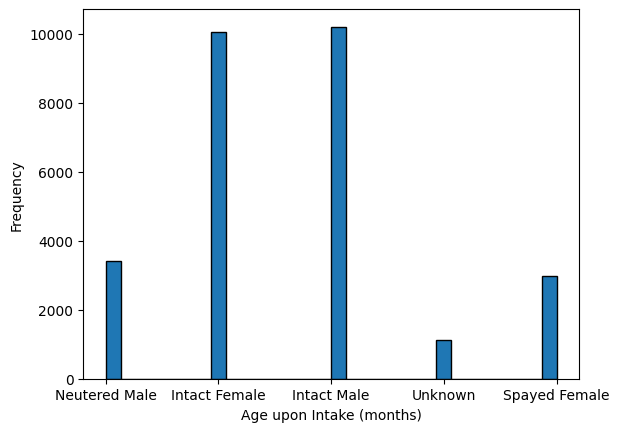

In [ ]:
# Now test the model on the test set
# Assume df is your full DataFrame

data2 = pd.read_csv('test.csv')
df = pd.DataFrame(data2)

# print(df2.head())

#Remove the columns that are not needed
# df = df.drop(['Name'], axis=1)
df = df.drop(['Found Location'], axis=1)

def convert_age_to_months(age):
    if pd.isnull(age):
        return None
    parts = age.split()
    if "year" in parts[1]:
        return int(parts[0]) * 12
    elif "month" in parts[1]:
        return int(parts[0])
    elif "week" in parts[1]:
        return int(parts[0]) / 4
    elif "day" in parts[1]:
        return int(parts[0]) / 30
    else:
        return None
    
def convert_age_to_weeks(age):
    if pd.isnull(age):
        return None
    parts = age.split()
    if "year" in parts[1]:
        return int(parts[0]) * 52
    elif "month" in parts[1]:
        return int(parts[0]) * 4
    elif "week" in parts[1]:
        return int(parts[0])
    elif "day" in parts[1]:
        return int(parts[0]) / 7
    else:
        return None

# Convert 'Age upon Intake' to months
df['Age upon Intake'] = df['Age upon Intake'].apply(convert_age_to_months)


mean = df['Age upon Intake'].mean()
median = df['Age upon Intake'].median()

df['Age upon Intake'] = df['Age upon Intake'].fillna(median)


#Evaluate the Sex Upon Intake column

#Graph Sex upon intake
plt.hist(df['Sex upon Intake'].dropna(), bins=30, edgecolor='black')
plt.xlabel('Age upon Intake (months)')
plt.ylabel('Frequency')

#We have an unknown category for Sex Upon Intake
# We can impute the missing values with the unknown category

# Impute Sex Upon Intake with the mode value
# df['Sex upon Intake'] = df['Sex upon Intake'].fillna(df['Sex upon Intake'].mode()[0])


# Impute the missing values with 'Unknown'
df['Sex upon Intake'] = df['Sex upon Intake'].fillna('Unknown')

# Verify the imputation
print(df['Sex upon Intake'].isnull().sum())

# Time In System category

# Create a new column 'Time In System' which is the difference between 'Intake Time Stamp' and 'Outcome Time Stamp'

df['Intake Time'] = pd.to_datetime(df['Intake Time'])

df['Outcome Time'] = pd.to_datetime(df['Outcome Time'])


df['Time In System'] = df['Outcome Time'] - df['Intake Time']
print(df['Time In System'].head())

# Convert 'Time In System' to days and hours
df['Time In System'] = df['Time In System'].dt.days + df['Time In System'].dt.seconds / 3600
print(df['Time In System'].head())

# Color of the animal
def split_colors(color):
    if pd.isnull(color):
        return None, None
    parts = color.replace('/', ' ').split()  # Replace '/' with space and split
    primary = parts[0] if len(parts) > 0 else None
    secondary = ' '.join(parts[1:]) if len(parts) > 1 else None
    return primary, secondary

df[['Primary Color', 'Secondary Color']] = df['Color'].apply(
    lambda x: pd.Series(split_colors(x))
)

#Remove the seconddary color column FOR NOW:
df = df.drop(['Secondary Color'], axis=1)

print(df['Primary Color'].isnull().sum())



# Animal Type

print(df['Animal Type'].unique())
print("Number of dogs:", len(df[df['Animal Type'] == 'Dog']))
print("Number of cats:", len(df[df['Animal Type'] == 'Cat']))
# Graph the animal type
plt.hist(df['Animal Type'], bins=30, edgecolor='black')
plt.xlabel('Animal Type')
plt.ylabel('Frequency')
plt.title('Distribution of Animal Type')
plt.show()

# Breed 

# print(df['Breed'].unique())
print("Number of unique breeds:", len(df['Breed'].unique()))


# For now we will just split pure breeds and mixed breeds
df['Breed Type'] = df['Breed'].apply(lambda x: 'Mixed' if 'Mix' in x else 'Pure')
# Graph the breed type
plt.hist(df['Breed Type'], bins=30, edgecolor='black')
plt.xlabel('Breed Type')
plt.ylabel('Frequency')
plt.title('Distribution of Breed Type')
plt.show()





# Intake Condition
# print(df['Intake Condition'].unique())
# print("Number of unique intake conditions:", len(df['Intake Condition'].unique()))
# # Graph the intake condition
# plt.hist(df['Intake Condition'], bins=30, edgecolor='black')
# plt.xlabel('Intake Condition')
# plt.ylabel('Frequency')
# plt.title('Distribution of Intake Condition')
# plt.show()

# Group the intake condition into the following:
# Medical-related: 'Med Attn', 'Medical', 'Med Urgent', 'Neurologic', 'Congenital', 'Parvo', 'Agonal'
# Life stage: 'Neonatal', 'Aged', 'Pregnant', 'Nursing'
# Health status: 'Normal', 'Injured', 'Sick', 'Behavior', 'Feral'
# Other: 'Unknown', 'Other', 'Space'

def group_intake_condition(condition):
    if pd.isnull(condition):
        return 'Other'
    condition = condition.lower()
    if condition in ['med attn', 'medical', 'med urgent', 'neurologic', 'congenital', 'parvo', 'agonal']:
        return 'Medical-related'
    elif condition in ['neonatal', 'aged', 'pregnant', 'nursing']:
        return 'Life stage'
    elif condition in ['normal', 'injured', 'sick']:
        return 'Health Status'
    elif condition in ['behavior', 'feral']:
        return 'Behavioral'
    else:
        return 'Other'

df['Intake Condition'] = df['Intake Condition'].apply(group_intake_condition)
# Verify the grouping  
print("Grouped intake conditions:")
print(df['Intake Condition'].unique())


# Graph the intake condition after grouping
plt.hist(df['Intake Condition'], bins=15, edgecolor='black')
plt.xlabel('Intake Condition')
plt.ylabel('Frequency')
plt.title('Distribution of Intake Condition after grouping')
plt.show()


# Intake Type
print(df['Intake Type'].unique())
print("Number of unique intake types:", len(df['Intake Type'].unique()))


#Combine abandoned with wildlife (wildlife only has 1 record)

df['Intake Type'] = df['Intake Type'].replace('Abandoned', 'Wildlife')
# Remove the 'Wildlife' category from the intake type
df = df[df['Intake Type'] != 'Wildlife']

print("Number of unique intake types after combining:", len(df['Intake Type'].unique()))

# Graph the intake type
plt.hist(df['Intake Type'], bins=30, edgecolor='black')
plt.xlabel('Intake Type')
plt.ylabel('Frequency')
plt.title('Distribution of Intake Type')
plt.show()



df = df.drop(['Intake Time', 'Outcome Time', 'Color', 'Breed', 'Id', 'Date of Birth'], axis=1)

print(df.columns)
print(df.head())
print(df.info())


# Encode categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# Step 2: Define features and target
X = df.drop('Outcome Type', axis=1)  # Features
y = df['Outcome Type']               # Target

# Run the model on the test set
y_pred = rf_model.predict(X)

# Report the balanced accuracy score on the test set
test_score = balanced_accuracy_score(y, y_pred)
print(f"Balanced Accuracy on test set: {test_score:.4f}")



